# Import necessary libraries


In [1]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt


# Load and Display Image



In [2]:
def load_and_display_image(image_path):
 
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return None

    # Convert BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.title("Original Image")
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    return image

# Convert to Grayscale and Display
Converts the image to grayscale and displays it.

In [3]:
def convert_to_grayscale(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image
    plt.figure(figsize=(6, 6))
    plt.title("Grayscale Image")
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.show()

    return gray

# Apply Gaussian Blur and Display
Applies Gaussian blur to the grayscale image to reduce noise and smooth it.

In [4]:
def apply_gaussian_blur(gray_image):
    
    
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Display the blurred image
    plt.figure(figsize=(6, 6))
    plt.title("Blurred Image")
    plt.imshow(blurred, cmap='gray')
    plt.axis('off')
    plt.show()

    return blurred

#  Decode BarCode
Decodes Bar codes or barcodes in the blurred image using the pyzbar library.


In [5]:
def decode_Bar_code(blurred_image):

    barcodes = decode(blurred_image)
    return barcodes

 # Extract and Display Bar Code Region
 Extracts the region of the image containing the Bar code and displays it.

In [6]:
def extract_Bar_code_region(image, barcode):

    x, y, w, h = barcode.rect

    expand_pixels=100

    # Expand the region by `expand_pixels` in all directions
    x_start = max(0, x - expand_pixels)
    y_start = max(0, y - expand_pixels)
    x_end = min(image.shape[1], x + w + expand_pixels)
    y_end = min(image.shape[0], y + h + expand_pixels)

    # Extract the expanded Bar code region
    Bar_code_region = image[y_start:y_end, x_start:x_end]

    # Convert the region to RGB for displaying
    Bar_code_region_rgb = cv2.cvtColor(Bar_code_region, cv2.COLOR_BGR2RGB)

    # Display the extracted Bar code region
    plt.figure(figsize=(6, 6))
    plt.title("Extracted Bar Code Region")
    plt.imshow(Bar_code_region_rgb)
    plt.axis('off')
    plt.show()

    return Bar_code_region

# Detect decode Bar code

In [7]:
def detect_decode_Bar_code(image_path):

    # Step 1: Load and display the original image
    image = load_and_display_image(image_path)
    if image is None:
        return

    # Step 2: Convert the image to grayscale and display
    gray = convert_to_grayscale(image)

    # Step 3: Apply Gaussian blur and display
    blurred = apply_gaussian_blur(gray)

    # Step 4: Decode Bar codes
    barcodes = decode_Bar_code(blurred)

    # Step 5: Process detected Bar codes
    if barcodes:
        for barcode in barcodes:
            print(f"Decoded Bar Code: {barcode.data.decode('utf-8')}, Type: {barcode.type}")

            # Extract numeric data from the Bar code
            Bar_code_data = barcode.data.decode('utf-8')
            numeric_data = ''.join(filter(str.isdigit, Bar_code_data))
            print(f"Extracted Numeric Data: {numeric_data}")

            # Step 6: Extract and display the Bar code region
            Bar_code_region = extract_Bar_code_region(image, barcode)

    else:
        print("No Bar code detected.")

# Test cases



## Test case 1

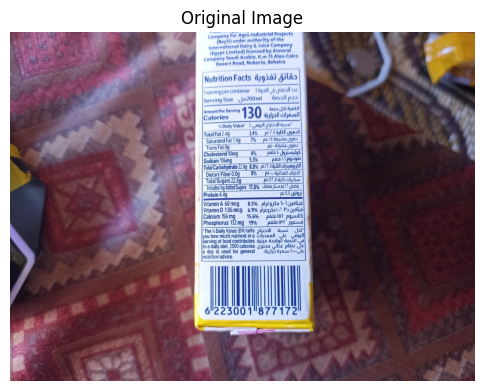

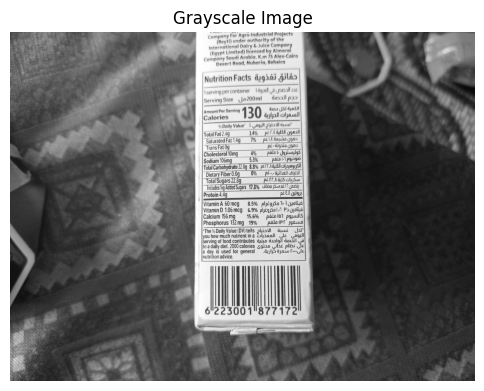

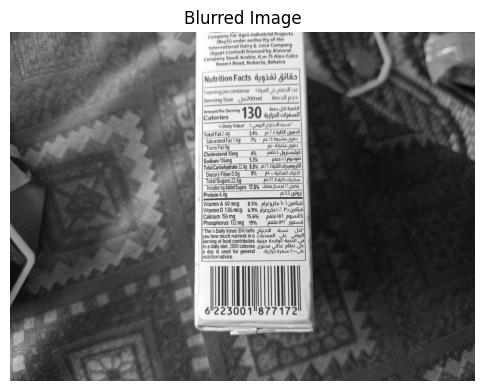

Decoded Bar Code: 6223001877172, Type: EAN13
Extracted Numeric Data: 6223001877172


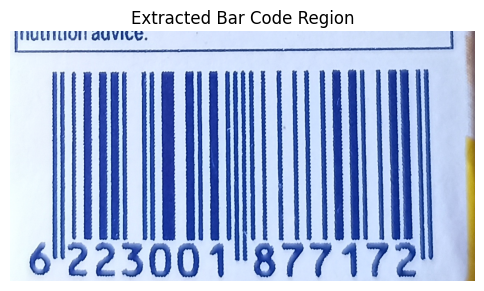

In [8]:
image_path = "images/1.jpg" 


detect_decode_Bar_code(image_path)

## Test case 2

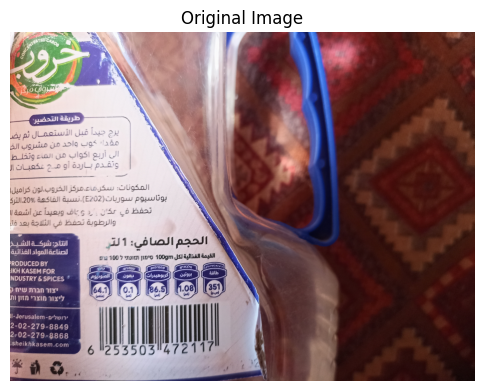

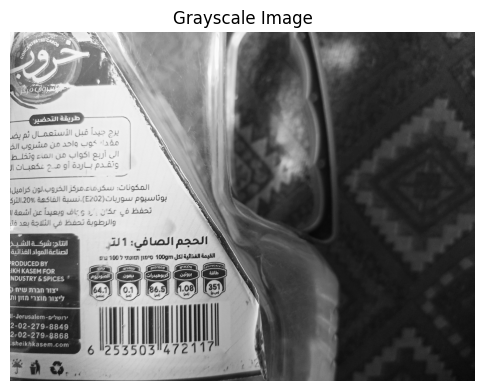

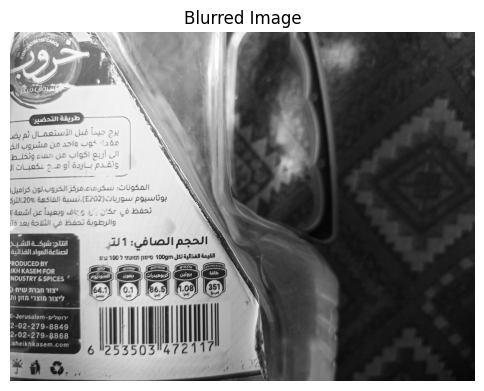

Decoded Bar Code: 6253503472117, Type: EAN13
Extracted Numeric Data: 6253503472117


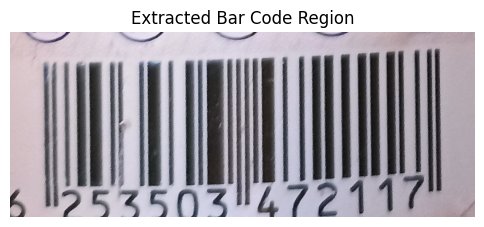

In [9]:
image_path = "images/2.jpg"  


detect_decode_Bar_code(image_path)

## Test case 3

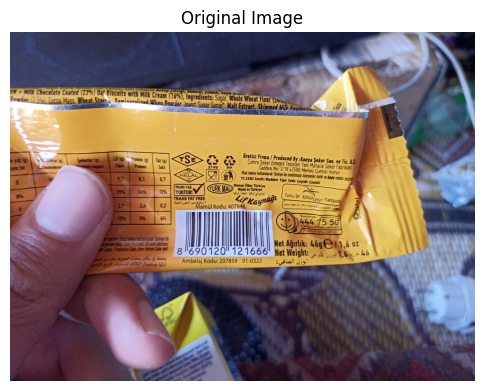

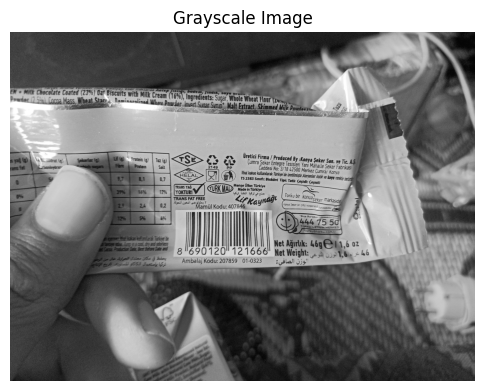

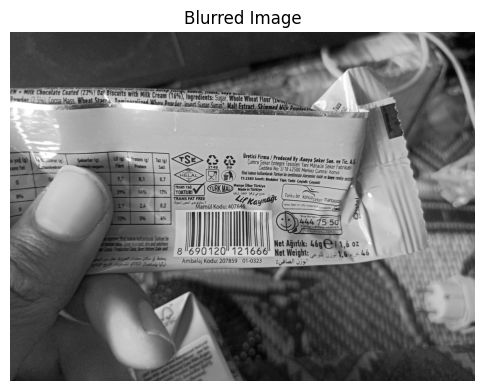

Decoded Bar Code: 8690120121666, Type: EAN13
Extracted Numeric Data: 8690120121666


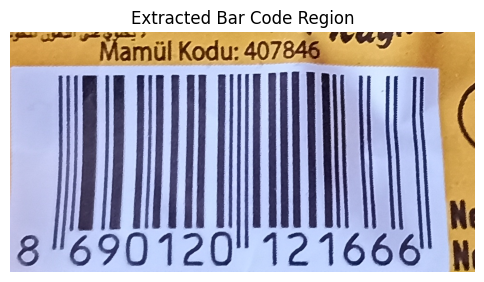

In [10]:
image_path = "images/3.jpg"  


detect_decode_Bar_code(image_path)